In [1]:
import numpy as np
from scipy.stats import chi2   
import matplotlib.pyplot as plt
import itertools
plt.style.use('style.mplstyle')

#Load Data
#NH
x_NH_prof=np.load("Output/x_NH_TD_coo_prof.npy",allow_pickle=True)
L_NH_prof=np.load("Output/Like_NH_TD_coo_prof.npy",allow_pickle=True)
m_c_NH_BF=np.load("Output/BF_NH_TD_coo.npy",allow_pickle=True)
m_c_NH_BF_like=np.load("Output/BF_like_NH_TD_coo.npy",allow_pickle=True)
x_NH=np.load("Output/x_NH_TD_coo_cont.npy",allow_pickle=True)
y_NH=np.load("Output/y_NH_TD_coo_cont.npy",allow_pickle=True)
L_NH=np.load("Output/Like_NH_TD_coo_cont.npy",allow_pickle=True)
#IH
x_IH_prof=np.load("Output/x_IH_TD_coo_prof.npy",allow_pickle=True)
L_IH_prof=np.load("Output/Like_IH_TD_coo_prof.npy",allow_pickle=True)
m_c_IH_BF=np.load("Output/BF_IH_TD_coo.npy",allow_pickle=True)
m_c_IH_BF_like=np.load("Output/BF_like_IH_TD_coo.npy",allow_pickle=True)
x_IH=np.load("Output/x_IH_TD_coo_cont.npy",allow_pickle=True)
y_IH=np.load("Output/y_IH_TD_coo_cont.npy",allow_pickle=True)
L_IH=np.load("Output/Like_IH_TD_coo_cont.npy",allow_pickle=True)
#Pee
x_Pee_prof=np.load("Output/x_Pee_TD_coo_prof.npy",allow_pickle=True)
L_Pee_prof=np.load("Output/Like_Pee_TD_coo_prof.npy",allow_pickle=True)
m_c_Pee_BF=np.load("Output/BF_Pee_TD_coo.npy",allow_pickle=True)
m_c_Pee_BF_like=np.load("Output/BF_like_Pee_TD_coo.npy",allow_pickle=True)
x_Pee=np.load("Output/x_Pee_TD_coo_cont.npy",allow_pickle=True)
y_Pee=np.load("Output/y_Pee_TD_coo_cont.npy",allow_pickle=True)
L_Pee=np.load("Output/Like_Pee_TD_coo_cont.npy",allow_pickle=True)

/tmp/ipykernel_176437/3390557845.py:82: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(ax[1,0],labels=["IH","NH","Pee","Best Fit - IH","Best Fit - NH","Best Fit - Pee"],loc="upper center", bbox_to_anchor=(0.46, 0., 0.1, .89),fontsize=28)


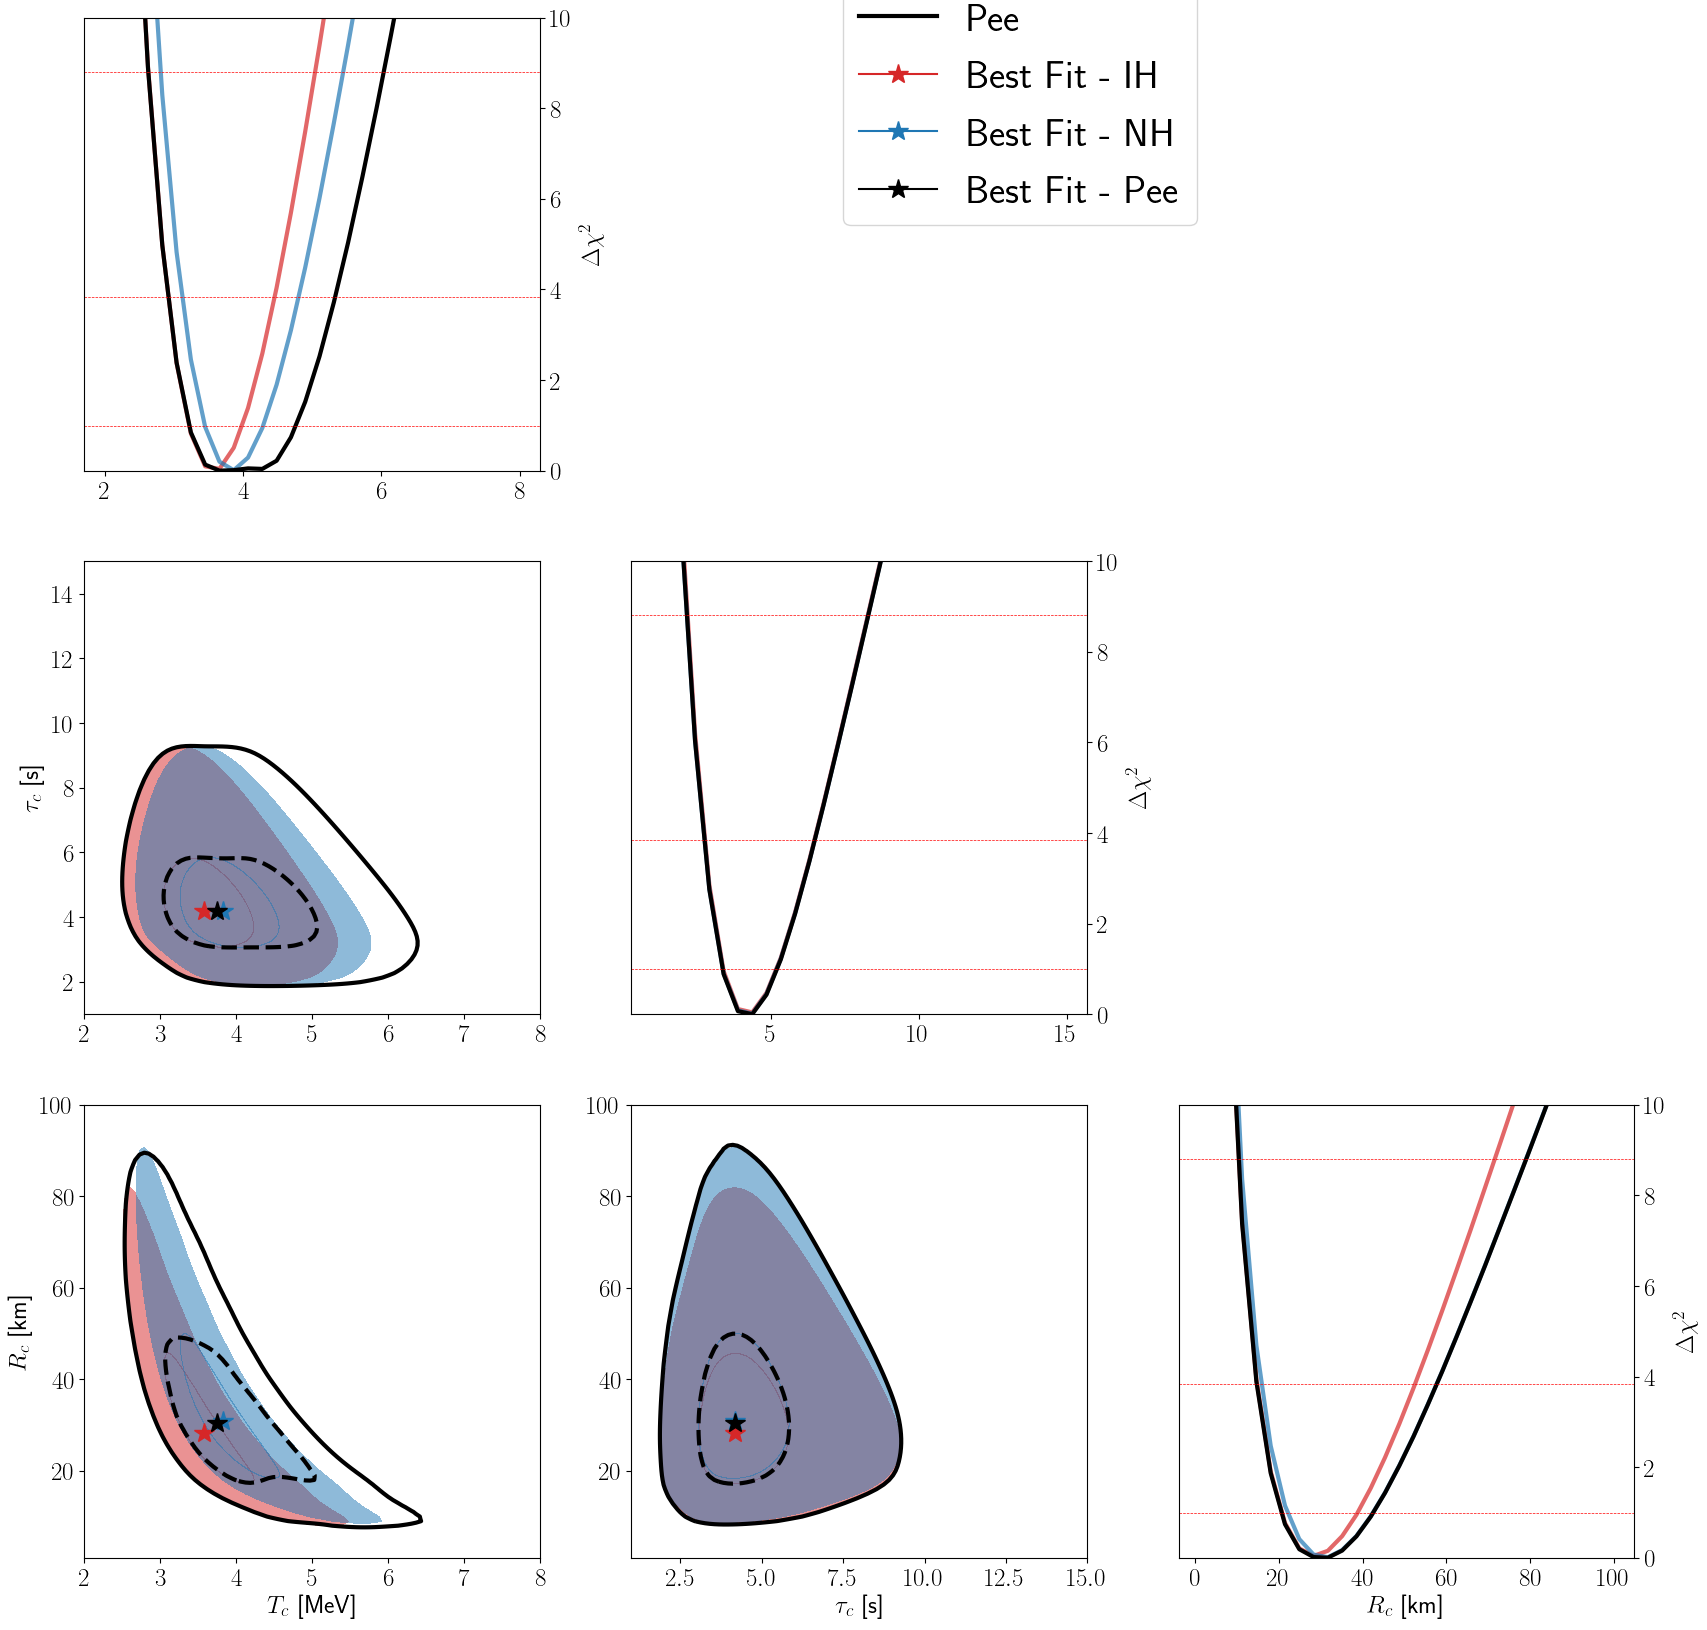

In [2]:
#Parameters allowed space
#Cooling
Tci, Tcf = 1, 10
tau_ci, tau_cf = 1, 40
Rci, Rcf = 1, 100
tau_i, tau_f = 1, 1.4

#Off-set times
toff_K_i,toff_K_f =0,6
toff_I_i,toff_I_f =0,6
toff_B_i,toff_B_f =0,6

#nubar_e survival probability 
Pee_i,Pee_f=0,1

params=["Tc","tau_c","Rc"]
params_index=[0,1,2]
params_lim=[(2,8), (tau_ci, 15), (Rci, Rcf)]
params_label=[r"$T_c$ [MeV]",r"$\tau_c$ [s]",r"$R_c$ [km]"]

fig, ax = plt.subplots(figsize=(20, 20), ncols=3, nrows=3)
fig.delaxes(ax[0, 1])
fig.delaxes(ax[0, 2])
fig.delaxes(ax[1, 2])
num_param=len(params_label)
font=18
lw=3

for i in params_index:
    ax_aux=ax[i,i]
    if i>=0:
        ax_aux.plot(x_IH_prof[i],L_IH_prof[i]+m_c_IH_BF_like-m_c_Pee_BF_like,lw=lw,c='tab:red', label='IH',alpha=0.7)
        ax_aux.plot(x_NH_prof[i],L_NH_prof[i]+m_c_NH_BF_like-m_c_Pee_BF_like,lw=lw,c='tab:blue', label='NH',alpha=0.7)
        ax_aux.plot(x_Pee_prof[i],L_Pee_prof[i],c='k', label='Pee',lw=lw)
        ax_aux.axhline(y=chi2.ppf(0.68, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axhline(y=chi2.ppf(0.95, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axhline(y=chi2.ppf(0.997, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.set_ylim(0,10)
        ax_aux.set_ylabel(r"$\Delta \chi^2$",fontsize=font)
        ax_aux.yaxis.set_label_position("right")
        ax_aux.yaxis.tick_right()
        if i==num_param-1:
            ax_aux.set_xlabel(params_label[i],fontsize=font)
    else:
        ax_aux.plot(L_NH_prof[i],x_NH_prof[i],c='b', label='NH',lw=lw)
        ax_aux.plot(L_IH_prof[i],x_IH_prof[i],c='orange', label='IH',lw=lw)
        ax_aux.plot(L_Pee_prof[i],x_Pee_prof[i],c='g', label='Pee',lw=lw)
        ax_aux.axvline(chi2.ppf(0.68, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axvline(chi2.ppf(0.95, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axvline(chi2.ppf(0.997, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.set_xlim(0,10)
        ax_aux.set_xlabel(r"$\Delta \chi^2$",fontsize=font)
        ax_aux.xaxis.set_label_position("top")
        ax_aux.xaxis.tick_top()
        
    ax_aux.tick_params(axis='both', which='major', labelsize=18)

l=0
levels=[chi2.ppf(0, 2),chi2.ppf(0.68, 2),chi2.ppf(0.997, 2)]
for i,j in itertools.combinations(params_index, 2):
    ax_aux=ax[j,i]
    
#     ax_aux.contour(x_IH[l][1],y_IH[l][1],np.transpose(L_IH[l][1]), levels=levels,colors="orange",linewidths=lw)
    ax_aux.contourf(x_IH[l][1],y_IH[l][1],np.transpose(L_IH[l][1])+m_c_IH_BF_like-m_c_Pee_BF_like, levels=levels,colors='tab:red',alpha=0.5)
    ax_aux.plot(m_c_IH_BF[i],m_c_IH_BF[j],marker="*",label="Best Fit - IH", markersize=15,color='tab:red')
    
#     ax_aux.contour(x_NH[l][1],y_NH[l][1],np.transpose(L_NH[l][1]), levels=levels,colors="b",linewidths=lw)
    ax_aux.contourf(x_NH[l][1],y_NH[l][1],np.transpose(L_NH[l][1])+m_c_NH_BF_like-m_c_Pee_BF_like, levels=levels,colors='tab:blue',alpha=0.5)
    ax_aux.plot(m_c_NH_BF[i],m_c_NH_BF[j],marker="*",label="Best Fit - NH", markersize=15,color='tab:blue')
    
    ax_aux.contour(x_Pee[l][1],y_Pee[l][1],np.transpose(L_Pee[l][1]), levels=levels,linestyles=["-","--"],colors='k',linewidths=lw)
#     ax_aux.contourf(x_Pee[l][1],y_Pee[l][1],np.transpose(L_Pee[l][1]), levels=levels,cmap="Greens_r",alpha=0.5)
    ax_aux.plot(m_c_Pee_BF[i],m_c_Pee_BF[j],marker="*",label="Best Fit - Pee", markersize=15,color="k")
    
    if i==0:
        ax_aux.set_ylabel(params_label[j],fontsize=font)
    if j==num_param-1:
        ax_aux.set_xlabel(params_label[i],fontsize=font)
    
    ax_aux.tick_params(axis='both', which='major', labelsize=18)
    l=l+1
fig.legend(ax[1,0],labels=["IH","NH","Pee","Best Fit - IH","Best Fit - NH","Best Fit - Pee"],loc="upper center", bbox_to_anchor=(0.46, 0., 0.1, .89),fontsize=28)
plt.savefig('plots_paper/Param_Triangle_Profile_Time_Dependent_Coo_filled.pdf', dpi=160)
plt.show()